# Data Science for Space Mission  History Analysis 

# Environment Setup

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/all-space-missions-from-1957/Space_Corrected.csv


# Space Missions From 1957 🚀 Data Analysis

<img src="https://specials-images.forbesimg.com/imageserve/5e3192b5f133f400076b0339/960x0.jpg?fit=scale" width="800" height="500" align="center"/>




# Part--1:

# Importing required libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

Data Read

In [3]:
df = pd.read_csv("../input/all-space-missions-from-1957/Space_Corrected.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [4]:
df.describe()

,Unnamed: 0,Unnamed: 0.1
count,4324.000000,4324.000000
mean,2161.500000,2161.500000
std,1248.375611,1248.375611
min,0.000000,0.000000
25%,1080.750000,1080.750000
50%,2161.500000,2161.500000
75%,3242.250000,3242.250000
max,4323.000000,4323.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [6]:
df.shape

(4324, 9)

# Data Pre-processing

In [7]:
# Extract the launch year
df['DateTime'] = pd.to_datetime(df['Datum'])
df['Year'] = df['DateTime'].apply(lambda datetime: datetime.year)

# Extract the country of launch
df["Country"] = df["Location"].apply(lambda location: location.split(", ")[-1])

df.head(10)

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,DateTime,Year,Country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,China
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,Kazakhstan
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,USA
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,2020-07-25 03:13:00+00:00,2020,China
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success,2020-07-23 14:26:00+00:00,2020,Kazakhstan
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success,2020-07-23 04:41:00+00:00,2020,China
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success,2020-07-20 21:30:00+00:00,2020,USA
9,9,9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success,2020-07-19 21:58:00+00:00,2020,Japan


# Data Visualization

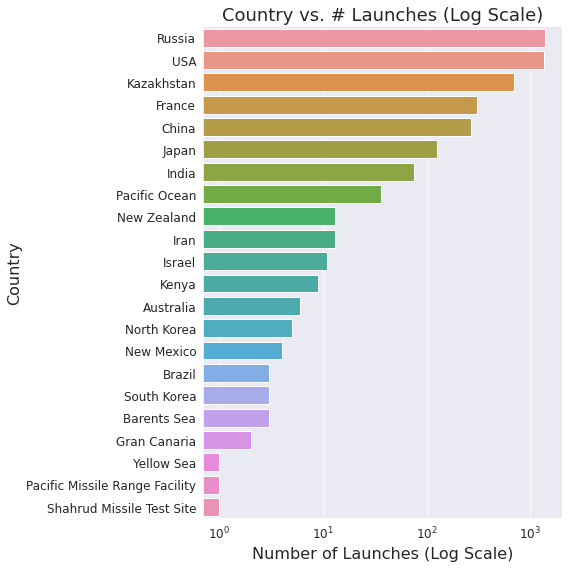

In [8]:
# Country vs Number of launches
plt.figure(figsize=(8,8))
ax = sns.countplot(y="Country", data=df, order=df["Country"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Country vs. # Launches (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Launches (Log Scale)",fontsize=16)
ax.set_ylabel("Country",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

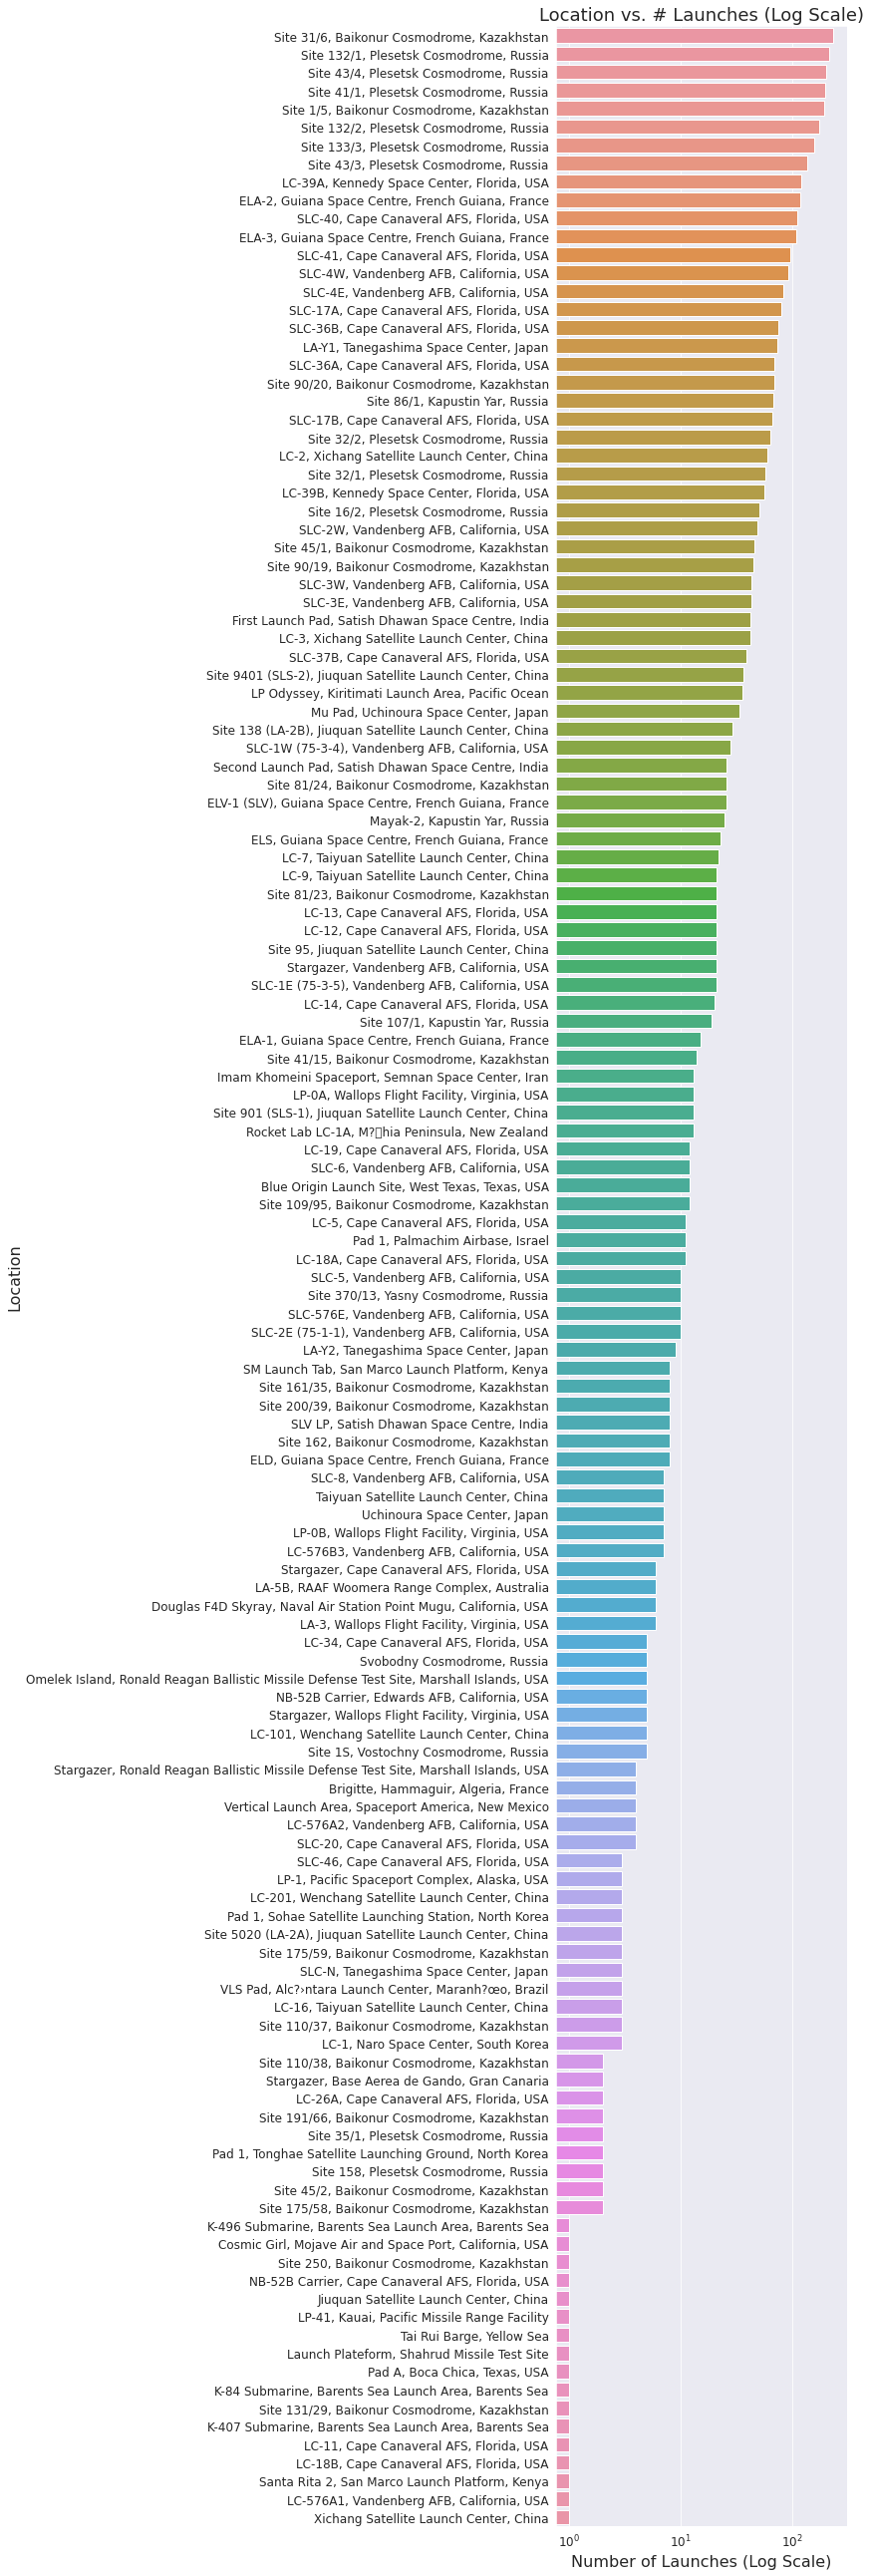

In [9]:
# Location vs Number of launches
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(12,36))
ax = sns.countplot(y="Location", data=df, order=df["Location"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Location vs. # Launches (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Launches (Log Scale)",fontsize=16)
ax.set_ylabel("Location",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

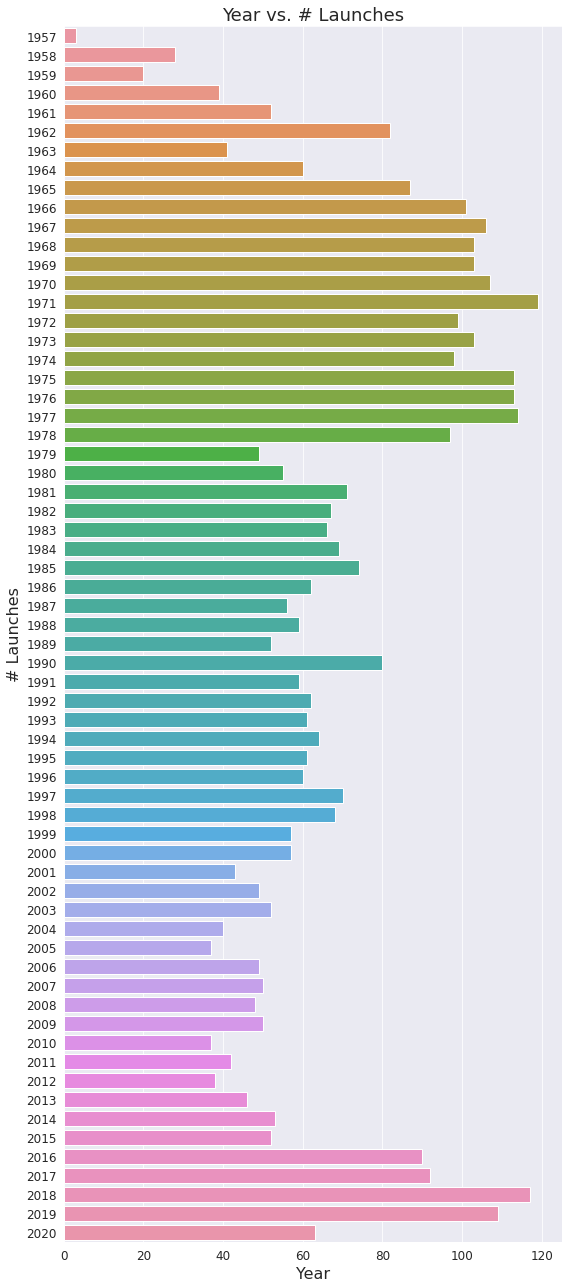

In [10]:
# Year vs Number of launches
plt.figure(figsize=(8,18))
ax = sns.countplot(y=df['Year'])
ax.axes.set_title("Year vs. # Launches",fontsize=18)
ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("# Launches",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

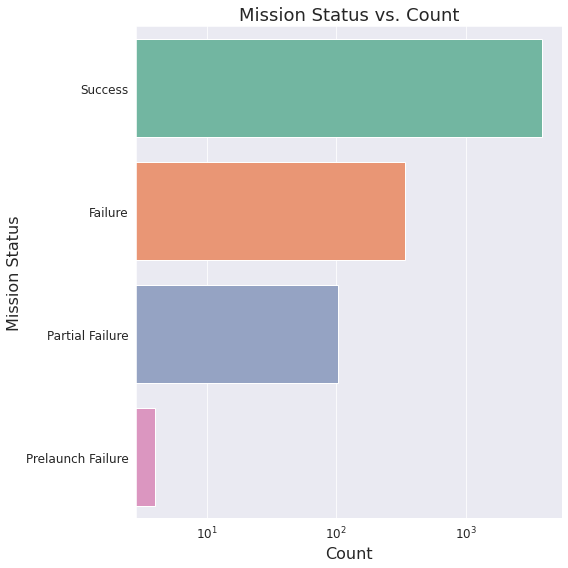

In [11]:
# Mission status vs Count
plt.figure(figsize=(8,8))
ax = sns.countplot(y="Status Mission", data=df, order=df["Status Mission"].value_counts().index, palette="Set2")
ax.set_xscale("log")
ax.axes.set_title("Mission Status vs. Count",fontsize=18)
ax.set_xlabel("Count",fontsize=16)
ax.set_ylabel("Mission Status",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

# Part--2

# Data Read

In [12]:
data = pd.read_csv('../input/all-space-missions-from-1957/Space_Corrected.csv')
data = data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
data.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [13]:
data[' Rocket'] = data[' Rocket'].str.replace(',', '')
data[' Rocket'] = data[' Rocket'].fillna(0)
data[' Rocket'] = data[' Rocket'].astype(float)

In [14]:
data.columns

Index(['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket',
       ' Rocket', 'Status Mission'],
      dtype='object')

In [15]:
data.shape

(4324, 7)

# Mission Status

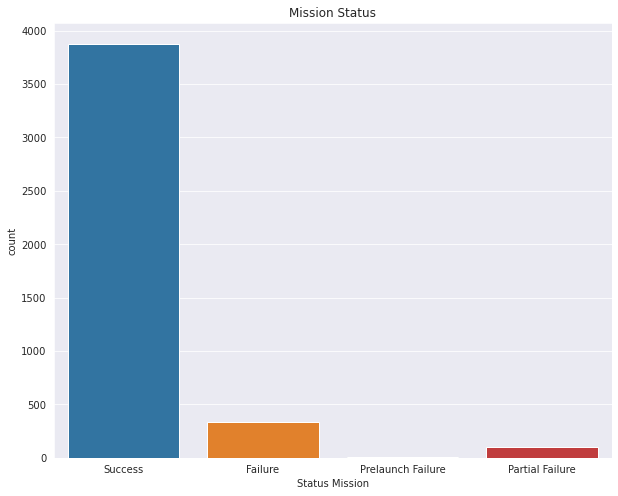

In [16]:
plt.figure(figsize=(10,8))
plt.title('Mission Status')
sns.countplot(data = data, x = 'Status Mission')

# Rocket Status

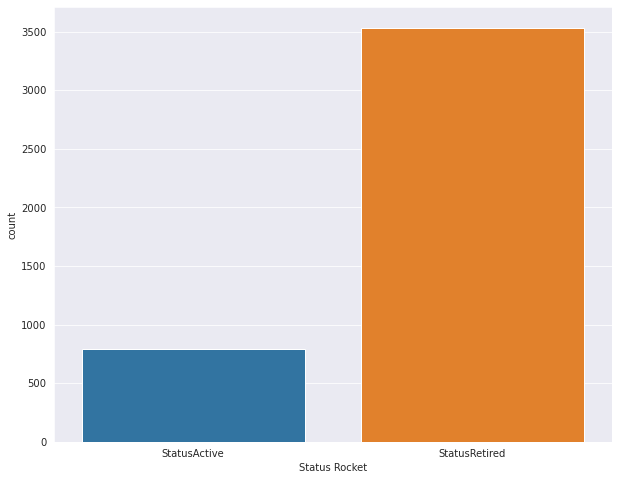

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(data = data, x = 'Status Rocket')

# Top Company

In [18]:
topcompany = data.groupby(['Company Name'])[' Rocket'].sum()
topcompany = topcompany.to_frame().reset_index()
topcompany.columns = ['Company Name','Spent Money']
topcompany = topcompany[topcompany['Spent Money']!=0]

# Company spending money in millions

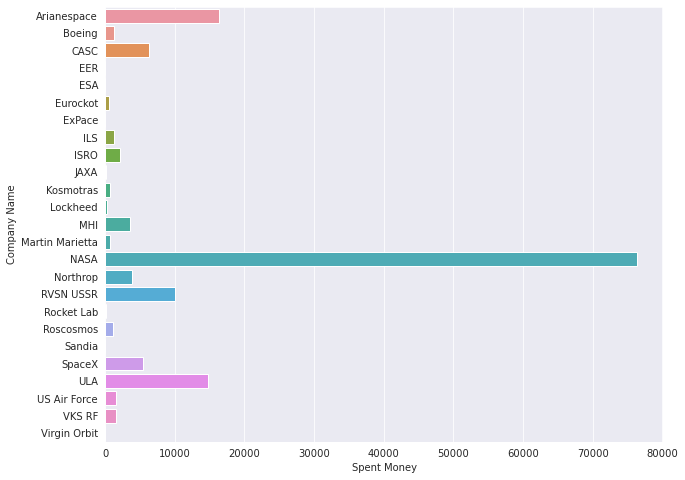

In [19]:
plt.figure(figsize=(10,8))
sns.barplot(data = topcompany, y ='Company Name',x = 'Spent Money')

#Data Pre-processing-Part-2

In [20]:

data['date'] = pd.to_datetime(data['Datum'])
data['year'] = data['date'].apply(lambda datetime: datetime.year)
data['month'] = data['date'].apply(lambda datetime: datetime.month)
data['weekday'] = data['date'].apply(lambda datetime: datetime.weekday())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 <a list of 64 Text major ticklabel objects>)

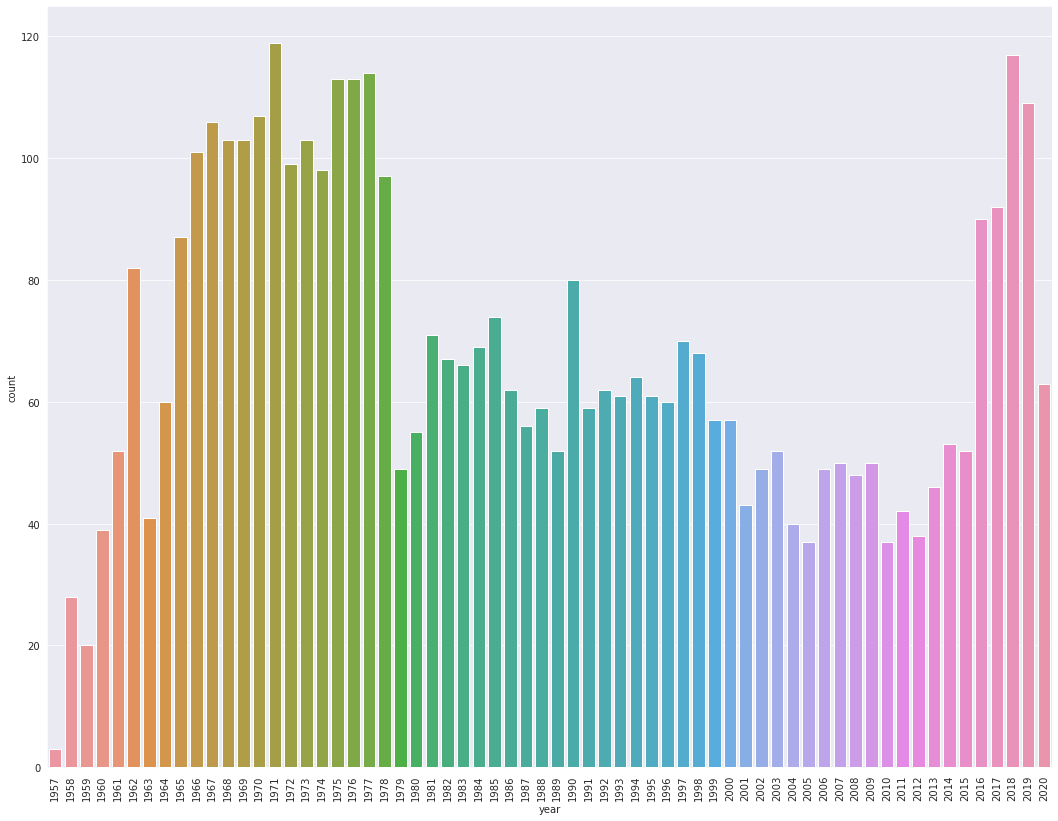

In [21]:
plt.figure(figsize=(18,14))
sns.countplot(data['year'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

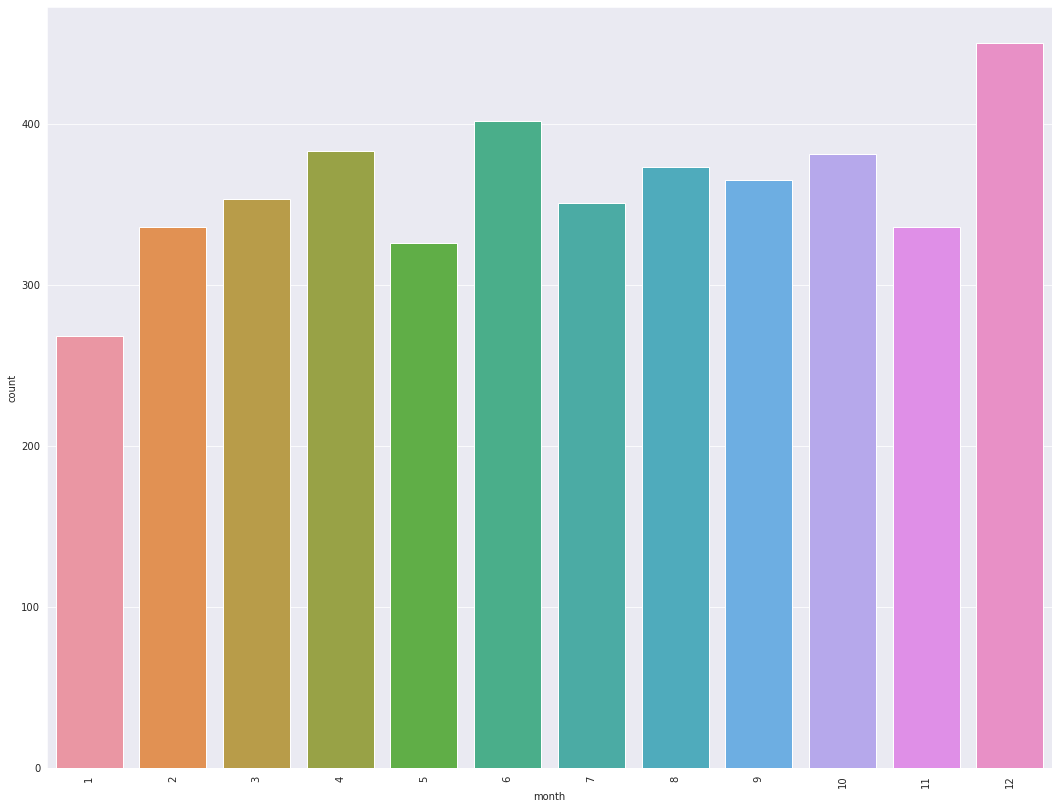

In [22]:
plt.figure(figsize=(18,14))
sns.countplot(data['month'])
plt.xticks(rotation=90)

In [23]:
data['country'] = data['Location'].str.split(', ').str[-1]
data.loc[data['country'] == 'Russia', 'country'] = 'Russian Federation'
data.loc[data['country'] == 'New Mexico', 'country'] = 'Mexico'

In [24]:
!pip install iso3166

In [25]:
from iso3166 import countries

country_dict = {}

for c in countries:
    country_dict[c.name] = c.alpha3

data['alpha3'] = data['country']
data = data.replace({"alpha3": country_dict})
data.loc[data['country'] == "North Korea", 'alpha3'] = "PRK"
data.loc[data['country'] == "South Korea", 'alpha3'] = "KOR"

In [26]:
geomap = data.groupby(['country', 'alpha3'])['Status Mission'].count().reset_index()

# Geo Map

In [27]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
from iso3166 import countries

In [28]:
continent = ['Asia','Europe','Africa','Americas','Oceania']
fig = px.scatter_geo(geomap, locations="alpha3",
                     hover_name="country",
                     size="Status Mission",
                     projection="natural earth", 
                     width=800, 
                     height=600, 
                     title='Number of missions country-wise')
fig.show()

# Country with the most successful missions

In [29]:
susmiss = data[data['Status Mission']=='Success']
susmiss = susmiss['country'].value_counts().reset_index()
susmiss.columns = ['Country','Number of successful missions']

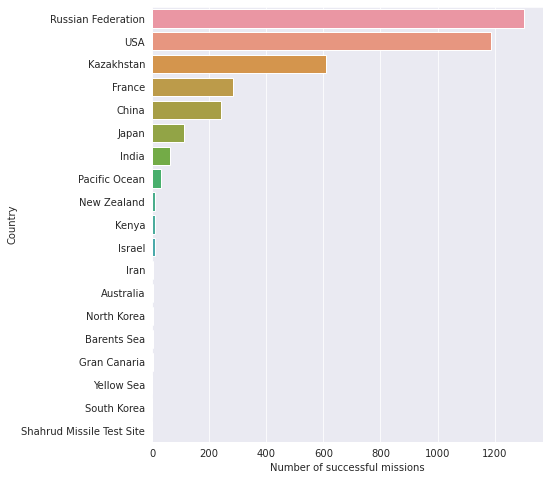

In [30]:
plt.figure(figsize=(7,8))
sns.barplot(data= susmiss, y = 'Country', x= 'Number of successful missions')

# Countries with the most failed missions

In [31]:
failmiss = data[data['Status Mission']!='Success']
failmiss = failmiss['country'].value_counts().reset_index()
failmiss.columns = ['Country','Number of failed missions']

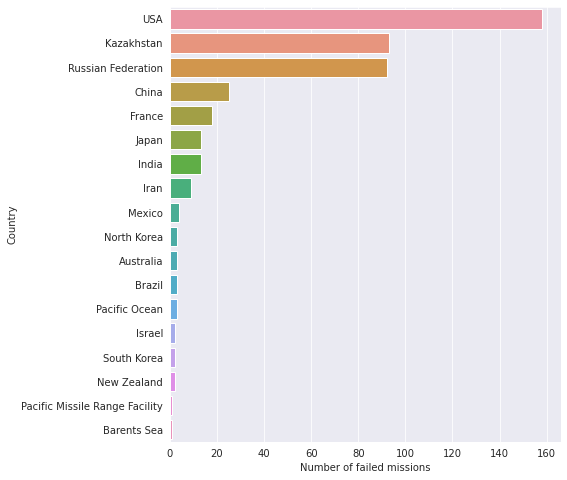

In [32]:
plt.figure(figsize=(7,8))
sns.barplot(data= failmiss, y = 'Country', x= 'Number of failed missions')

# Space Company with the most successful missions

In [33]:
suscomp = data[data['Status Mission']=='Success']
suscomp = suscomp['Company Name'].value_counts().reset_index()
suscomp.columns = ['Company Name','Number of successful missions']

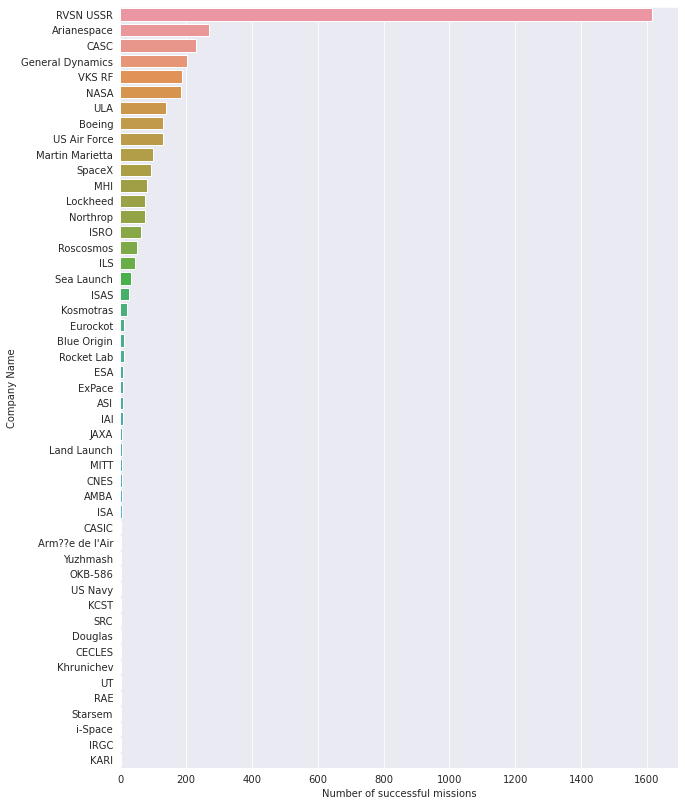

In [34]:
plt.figure(figsize=(10,14))
sns.barplot(data= suscomp, y = 'Company Name', x= 'Number of successful missions')

# Space Company with the most failed missions

In [35]:
failcomp = data[data['Status Mission']!='Success']
failcomp = failcomp['Company Name'].value_counts().reset_index()
failcomp.columns = ['Company Name','Number of failed missions']

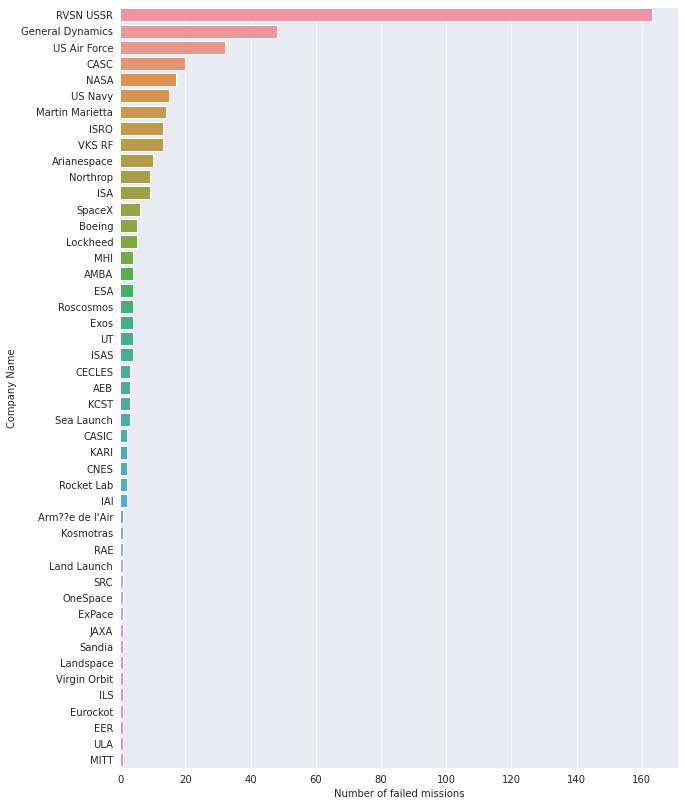

In [36]:
plt.figure(figsize=(10,14))
sns.barplot(data= failcomp, y = 'Company Name', x= 'Number of failed missions')